<a href="https://colab.research.google.com/github/Esther-Zhou99/Data-Science/blob/main/HW4_step1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycountry
!pip install geograpy3
!pip install mip
!pip install pycity

     |████████████████████████████████| 10.1MB 5.1MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=e262e4ab6cdfb463c5e774dab3cf622ddc5477ce688d4fe4777068411a578c81
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry
     |████████████████████████████████| 1.5MB 1.3MB/s 
     |████████████████████████████████| 215kB 7.8MB/s 
     |████████████████████████████████| 92kB 4.7MB/s 
     |████████████████████████████████| 92kB 4.8MB/s 
     |████████████████████████████████| 7.4MB 329kB/s 
     |████████████████████████████████| 81kB 5.5MB/s 
     |████████████████████████████████| 235kB 7.4MB/s 
     |████████████████████████████████| 51kB 4.2MB/s 
  Created wheel for jieba3k: filename=jieba3k-0.35.1-cp37-none-any.whl size=7398406 sha256=3734e602c9dfa2b979100409b0d8dfecd1ba6ddd21361c080513d680b0c10e1f
  Stored in directory: /root/.cache/pip/wheels/83/15

# **Build a dataset**

**Get the absolute location of the universities**

In [2]:
from geopy.geocoders import Nominatim
from geopy .distance import geodesic
geolocator = Nominatim(user_agent="my-application")

In [3]:
location1 = geolocator.geocode("NYU")
School1 = (location1.latitude, location1.longitude)
school1=tuple(list(School1)+["NYU"])

location2 = geolocator.geocode("华东师范大学")
School2 = (location2.latitude, location2.longitude)
school2=tuple(list(School2)+["ECNU"])

location3 = geolocator.geocode("Rensselaer Polytechnic Institute")
School3 = (location3.latitude, location3.longitude)
school3=tuple(list(School3)+["RPI"])

location4 = geolocator.geocode("University of Cambridge")
School4 = (location4.latitude, location4.longitude)
school4=tuple(list(School4)+["Cambridge"])

location5 = geolocator.geocode("Harvard")
School5 = (location5.latitude, location5.longitude)
school5=tuple(list(School5)+["Harvard"])

location6 = geolocator.geocode("UC Berkeley")
School6 = (location6.latitude, location6.longitude)
school6=tuple(list(School6)+["UCB"])

schools = [school1,school2,school3,school4,school5,school6]
Schools = [School1,School2,School3,School4,School5,School6]

schools

[(40.72925325, -73.99625393609625, 'NYU'),
 (31.2284923, 121.40211388976886, 'ECNU'),
 (42.729921950000005, -73.67953982458829, 'RPI'),
 (52.1998523, 0.11973865741074383, 'Cambridge'),
 (42.36790855, -71.12678237443698, 'Harvard'),
 (37.8753497, -122.23963364918777, 'UCB')]

In [4]:
Schools

[(40.72925325, -73.99625393609625),
 (31.2284923, 121.40211388976886),
 (42.729921950000005, -73.67953982458829),
 (52.1998523, 0.11973865741074383),
 (42.36790855, -71.12678237443698),
 (37.8753497, -122.23963364918777)]

**Calculate the distance**

In [5]:
values=[]
for i in range(len(schools)):
  for j in range (i+1,len(schools)):
      distance=geodesic(Schools[i],Schools[j]).miles
      values.append((str(schools[i][2]),str(schools[j][2]),distance))
      values.append((str(schools[j][2]),str(schools[i][2]),distance))
values

[('NYU', 'ECNU', 7383.018286810869),
 ('ECNU', 'NYU', 7383.018286810869),
 ('NYU', 'RPI', 139.04223314547826),
 ('RPI', 'NYU', 139.04223314547826),
 ('NYU', 'Cambridge', 3464.5239336374602),
 ('Cambridge', 'NYU', 3464.5239336374602),
 ('NYU', 'Harvard', 186.84769401088033),
 ('Harvard', 'NYU', 186.84769401088033),
 ('NYU', 'UCB', 2560.605184749848),
 ('UCB', 'NYU', 2560.605184749848),
 ('ECNU', 'RPI', 7252.559126720535),
 ('RPI', 'ECNU', 7252.559126720535),
 ('ECNU', 'Cambridge', 5685.086351468038),
 ('Cambridge', 'ECNU', 5685.086351468038),
 ('ECNU', 'Harvard', 7304.458477399387),
 ('Harvard', 'ECNU', 7304.458477399387),
 ('ECNU', 'UCB', 6157.4606338945805),
 ('UCB', 'ECNU', 6157.4606338945805),
 ('RPI', 'Cambridge', 3364.968097171021),
 ('Cambridge', 'RPI', 3364.968097171021),
 ('RPI', 'Harvard', 132.65225116811908),
 ('Harvard', 'RPI', 132.65225116811908),
 ('RPI', 'UCB', 2551.4913177807866),
 ('UCB', 'RPI', 2551.4913177807866),
 ('Cambridge', 'Harvard', 3277.7409970548592),
 ('Harv

In [6]:
from random import choice
import numpy as np
import sys

dt = np.dtype([("city_start", "S10"), ("city_end", "S10"), ("distance", int)])
data_set = np.array(values, dtype=dt)
data_set

array([(b'NYU', b'ECNU', 7383), (b'ECNU', b'NYU', 7383),
       (b'NYU', b'RPI',  139), (b'RPI', b'NYU',  139),
       (b'NYU', b'Cambridge', 3464), (b'Cambridge', b'NYU', 3464),
       (b'NYU', b'Harvard',  186), (b'Harvard', b'NYU',  186),
       (b'NYU', b'UCB', 2560), (b'UCB', b'NYU', 2560),
       (b'ECNU', b'RPI', 7252), (b'RPI', b'ECNU', 7252),
       (b'ECNU', b'Cambridge', 5685), (b'Cambridge', b'ECNU', 5685),
       (b'ECNU', b'Harvard', 7304), (b'Harvard', b'ECNU', 7304),
       (b'ECNU', b'UCB', 6157), (b'UCB', b'ECNU', 6157),
       (b'RPI', b'Cambridge', 3364), (b'Cambridge', b'RPI', 3364),
       (b'RPI', b'Harvard',  132), (b'Harvard', b'RPI',  132),
       (b'RPI', b'UCB', 2551), (b'UCB', b'RPI', 2551),
       (b'Cambridge', b'Harvard', 3277), (b'Harvard', b'Cambridge', 3277),
       (b'Cambridge', b'UCB', 5329), (b'UCB', b'Cambridge', 5329),
       (b'Harvard', b'UCB', 2684), (b'UCB', b'Harvard', 2684)],
      dtype=[('city_start', 'S10'), ('city_end', 'S10'), ('dista

# **Greedy-Random-TSP**

**Find all universities in the dataset**

In [7]:
def all_cities():
    """Finds unique cities
    array([["A", "A"],
    ["A", "B"]])
    """
    cities = {}
    city_set = set(data_set["city_end"])
    for city in city_set:
        cities[city] = ""
    return cities
all_cities()

{b'Cambridge': '',
 b'ECNU': '',
 b'Harvard': '',
 b'NYU': '',
 b'RPI': '',
 b'UCB': ''}

**Return a randomized city to start trip**

In [8]:
def randomize_city_start(cities):
    """Returns a randomized city to start trip"""
    return choice(cities)

In [9]:
def get_shortest_route(routes):
    """Sort the list by distance and return shortest distance route"""
    route = sorted(routes, key=lambda dist: dist[2]).pop(0)
    return route

In [10]:
def greedy_path():
    """Select the next path to travel based on the shortest, nearest path"""
    itinerary = []
    cities = all_cities()
    starting_city = randomize_city_start(list(cities.keys()))
    #print ("starting_city: %s" % starting_city)
    cities_visited = {}
    # we want to iterate through all cities once
    count = 1
    while True:
        possible_routes = []
        # print ("starting city: %s" % starting_city)
        for path in data_set:
            if starting_city in path["city_start"]:
                # we can't go to cities we have already visited
                if path["city_end"] in cities_visited:
                    continue
                else:
                    # print "path: ", path
                    possible_routes.append(path)

        if not possible_routes:
            break
        # append this to itinerary
        route = get_shortest_route(possible_routes)
        # print("Route(%s): %s " % (count, route))
        count += 1
        itinerary.append(route)
        # add this city to the visited city list
        cities_visited[route[0]] = count
        # print ("cities_visited: %s " % cities_visited)
        # reset the starting_city to the next city
        starting_city = route[1]
        # print ("itinerary: %s" % itinerary)

    return itinerary

In [11]:
def get_total_distance(complete_itinerary):
    distance = sum(z for x, y, z in complete_itinerary)
    return distance

In [12]:
def lowest_simulation(num):
    routes = {}
    for _ in range(num):
        itinerary = greedy_path()
        distance = get_total_distance(itinerary)
        routes[distance] = itinerary
    shortest_distance = min(routes.keys())
    route = routes[shortest_distance]
    return shortest_distance, route

In [13]:
def main():
    """runs everything"""
    if len(sys.argv) == 2:
        iterations = int(sys.argv[1])
        print("Running simulation %s times" % iterations)
        distance, route = lowest_simulation(iterations)
        print("Shortest Distance: %s" % distance)
        print("Optimal Route: %s" % route)
    else:
       # print ("All Routes: %s" % data_set)
        itinerary = greedy_path()
        print("itinerary: %s" % itinerary)
        print("Distance: %s" % get_total_distance(itinerary))

In [14]:
if __name__ == "__main__":
    main()

itinerary: [(b'NYU', b'RPI', 139), (b'RPI', b'Harvard', 132), (b'Harvard', b'UCB', 2684), (b'UCB', b'Cambridge', 5329), (b'Cambridge', b'ECNU', 5685)]
Distance: 13969


itinerary: [(b'NYU', b'RPI', 139), (b'RPI', b'Harvard', 132), (b'Harvard', b'UCB', 2684), (b'UCB', b'Cambridge', 5329), (b'Cambridge', b'ECNU', 5685)]
Distance: 13969


itinerary: [(b'RPI', b'Harvard', 132), (b'Harvard', b'NYU', 186), (b'NYU', b'UCB', 2560), (b'UCB', b'Cambridge', 5329), (b'Cambridge', b'ECNU', 5685)]
Distance: 13892

itinerary: [(b'UCB', b'RPI', 2551), (b'RPI', b'Harvard', 132), (b'Harvard', b'NYU', 186), (b'NYU', b'Cambridge', 3464), (b'Cambridge', b'ECNU', 5685)]
Distance: 12018

itinerary: [(b'ECNU', b'Cambridge', 5685), (b'Cambridge', b'Harvard', 3277), (b'Harvard', b'RPI', 132), (b'RPI', b'NYU', 139), (b'NYU', b'UCB', 2560)]
Distance: 11793

itinerary: [(b'Cambridge', b'Harvard', 3277), (b'Harvard', b'RPI', 132), (b'RPI', b'NYU', 139), (b'NYU', b'UCB', 2560), (b'UCB', b'ECNU', 6157)]        
Distance: 12265

itinerary: [(b'Harvard', b'RPI', 132), (b'RPI', b'NYU', 139), (b'NYU', b'UCB', 2560), (b'UCB', b'Cambridge', 5329), (b'Cambridge', b'ECNU', 5685)]
Distance: 13845

In [15]:
schools

[(40.72925325, -73.99625393609625, 'NYU'),
 (31.2284923, 121.40211388976886, 'ECNU'),
 (42.729921950000005, -73.67953982458829, 'RPI'),
 (52.1998523, 0.11973865741074383, 'Cambridge'),
 (42.36790855, -71.12678237443698, 'Harvard'),
 (37.8753497, -122.23963364918777, 'UCB')]

In [16]:
Schools

[(40.72925325, -73.99625393609625),
 (31.2284923, 121.40211388976886),
 (42.729921950000005, -73.67953982458829),
 (52.1998523, 0.11973865741074383),
 (42.36790855, -71.12678237443698),
 (37.8753497, -122.23963364918777)]

In [17]:
type = np.dtype([("latitude", float), ("longitude", float)])
cities = np.array(Schools,dtype=type)
cities

array([(40.72925325, -7.39962539e+01), (31.2284923 ,  1.21402114e+02),
       (42.72992195, -7.36795398e+01), (52.1998523 ,  1.19738657e-01),
       (42.36790855, -7.11267824e+01), (37.8753497 , -1.22239634e+02)],
      dtype=[('latitude', '<f8'), ('longitude', '<f8')])

Text(40.72925325, -73.99625393609625, '')

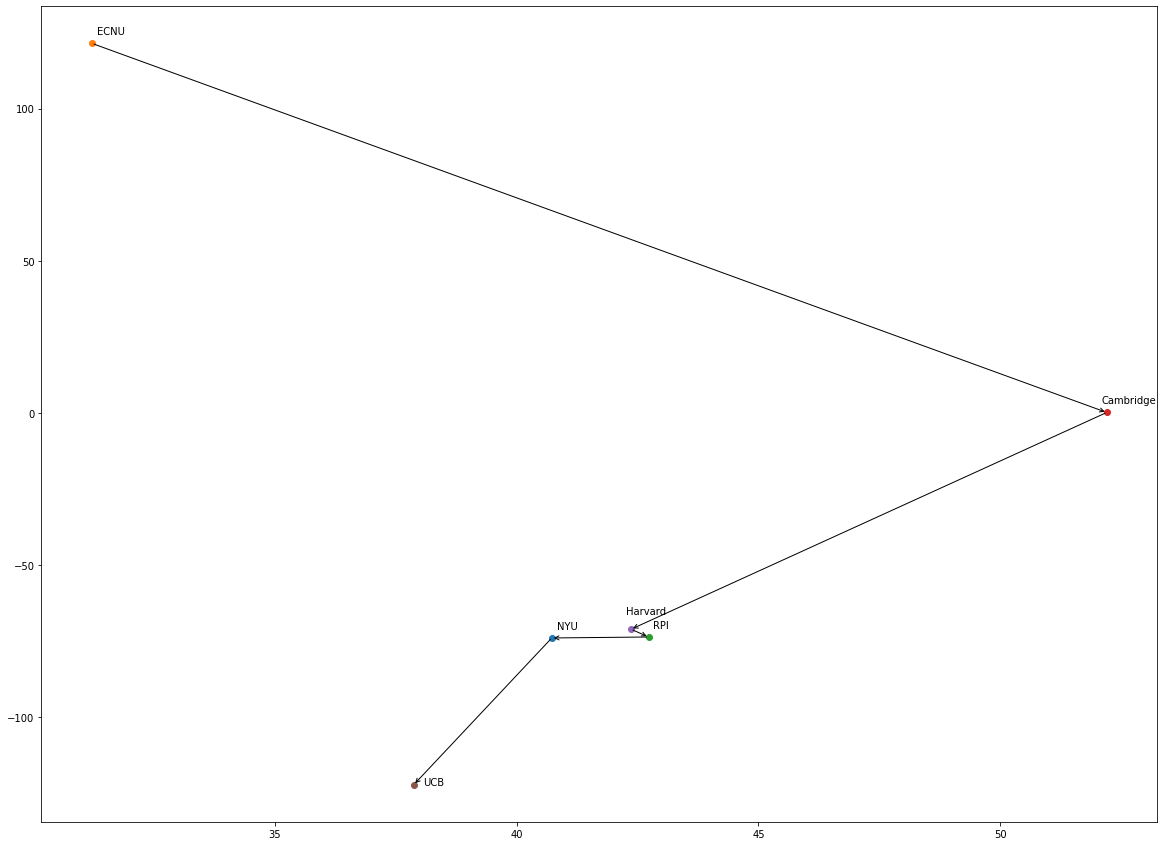

In [18]:
label = ['NYU','ECNU','RPI']
import matplotlib. pyplot as plt
from math import sqrt
plt.figure(figsize=(20,15))
for c in cities:
    plt.scatter(x = c[0], y = c[1])
for i, text in enumerate(label):
    plt.annotate(text, (cities[i][0]+0.1,cities[i][1]+3))

plt.annotate("Harvard",(cities[4][0]-0.1,cities[4][1]+5))
plt.annotate("UCB",(cities[5][0]+0.2,cities[5][1]))
plt.annotate('Cambridge',(cities[3][0]-0.1,cities[3][1]+3))


plt.annotate("", xy=cities[3], xytext=cities[1],
    arrowprops=dict(arrowstyle="->"))

plt.annotate("", xy=cities[4], xytext=cities[3],
    arrowprops=dict(arrowstyle="->"))


plt.annotate("", xy=cities[2], xytext=cities[4],
    arrowprops=dict(arrowstyle="->"))



plt.annotate("", xy=cities[0], xytext=cities[2],
    arrowprops=dict(arrowstyle="->"))

plt.annotate("", xy=cities[5], xytext=cities[0],
    arrowprops=dict(arrowstyle="->"))